### Anotaciones
* _holiday_ incluye a _shops closed_
* trabajar con la fecha

In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [427]:
df =  pd.read_csv('train.csv')

In [428]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change"])
df_clean

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,Budapest_1_2024-03-13


In [429]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [430]:
df.orders.max()

18139.0

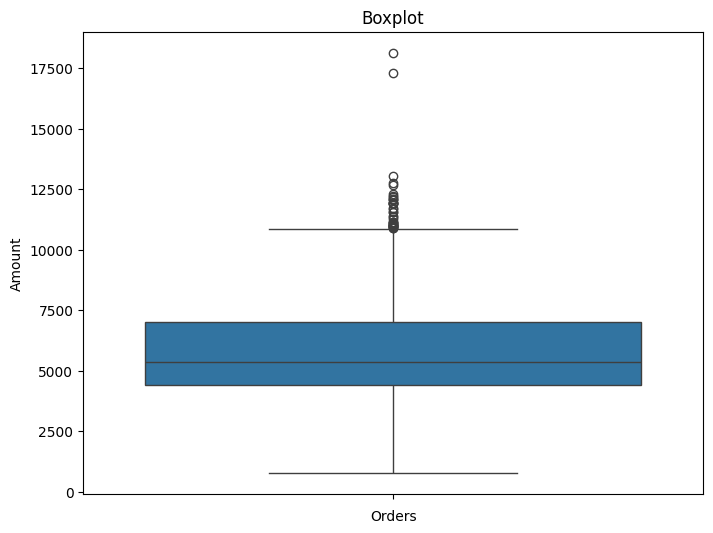

In [431]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [432]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [433]:
df[df.frankfurt_shutdown == 1]

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
5932,Frankfurt_1,2023-05-17,1507.0,NaN,0,0,0,0,0,0,0,1.0,1,0.0,0.0,813.0,6335.0,Frankfurt_1_2023-05-17
5933,Frankfurt_1,2023-05-19,1183.0,NaN,0,0,0,0,0,0,0,1.0,1,0.0,0.0,802.0,6254.0,Frankfurt_1_2023-05-19


## La columna de frankfurt no parece ser relevante para el entrenamiento

In [434]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [435]:
df_holiday = df[df.holiday == 1]

In [436]:
df_no_holiday = df[df.holiday == 0]

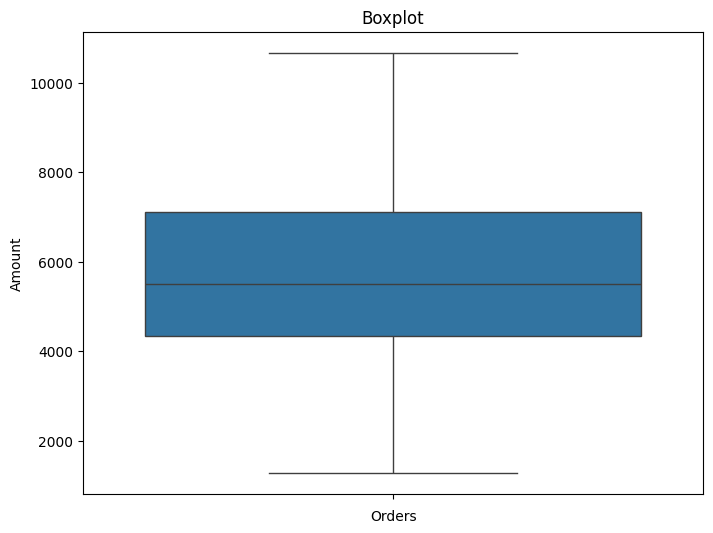

In [437]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

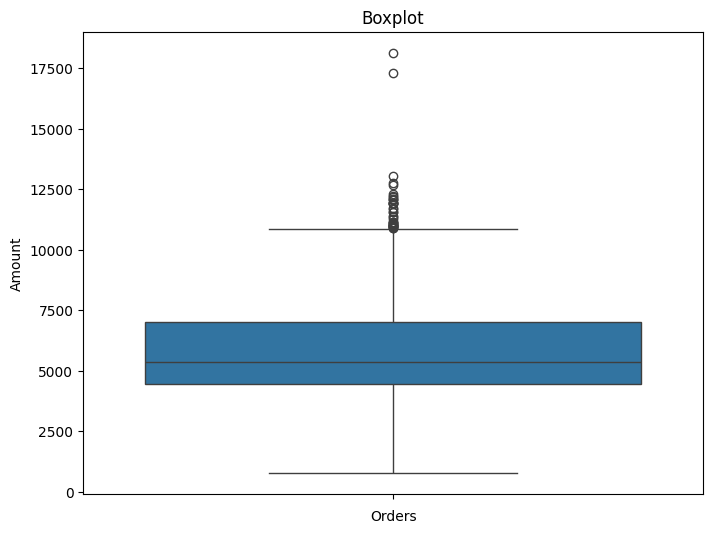

In [438]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [439]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [440]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change"])
df_clean

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,Budapest_1_2024-03-13


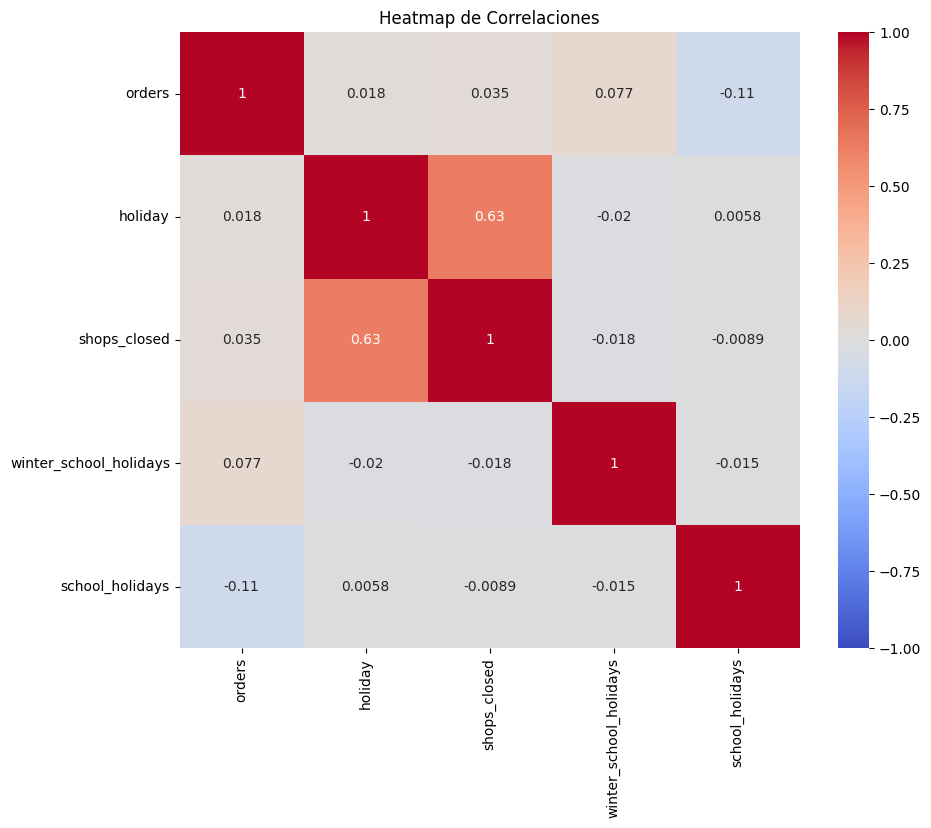

In [441]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'id', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [442]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)

In [443]:
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [444]:
# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_clean[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_clean["user_activity_1"] = pd.merge(df_clean, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_clean[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_clean["user_activity_2"] = pd.merge(df_clean, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_clean[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_8677/1906015879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_clean[["warehouse"]]
/tmp/ipykernel_8677/1906015879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_clean[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,843.635930,6133.895072
7336,843.635930,6133.895072
7337,843.635930,6133.895072
7338,843.635930,6133.895072


In [445]:
df_clean = pd.concat([df_clean.drop('warehouse', axis=1), pd.get_dummies(df_clean.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_clean

,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_other
0,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05,1671.156748,36898.751048,0,0,0,1,0
1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06,1671.156748,36898.751048,0,0,0,1,0
2,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07,1671.156748,36898.751048,0,0,0,1,0
3,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08,1671.156748,36898.751048,0,0,0,1,0
4,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09,1671.156748,36898.751048,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,2024-03-10,6733.0,NaN,0,0,0,0,Budapest_1_2024-03-10,843.635930,6133.895072,0,0,0,0,1
7336,2024-03-11,6492.0,NaN,0,0,0,0,Budapest_1_2024-03-11,843.635930,6133.895072,0,0,0,0,1
7337,2024-03-12,6661.0,NaN,0,0,0,0,Budapest_1_2024-03-12,843.635930,6133.895072,0,0,0,0,1
7338,2024-03-13,6843.0,NaN,0,0,0,0,Budapest_1_2024-03-13,843.635930,6133.895072,0,0,0,0,1


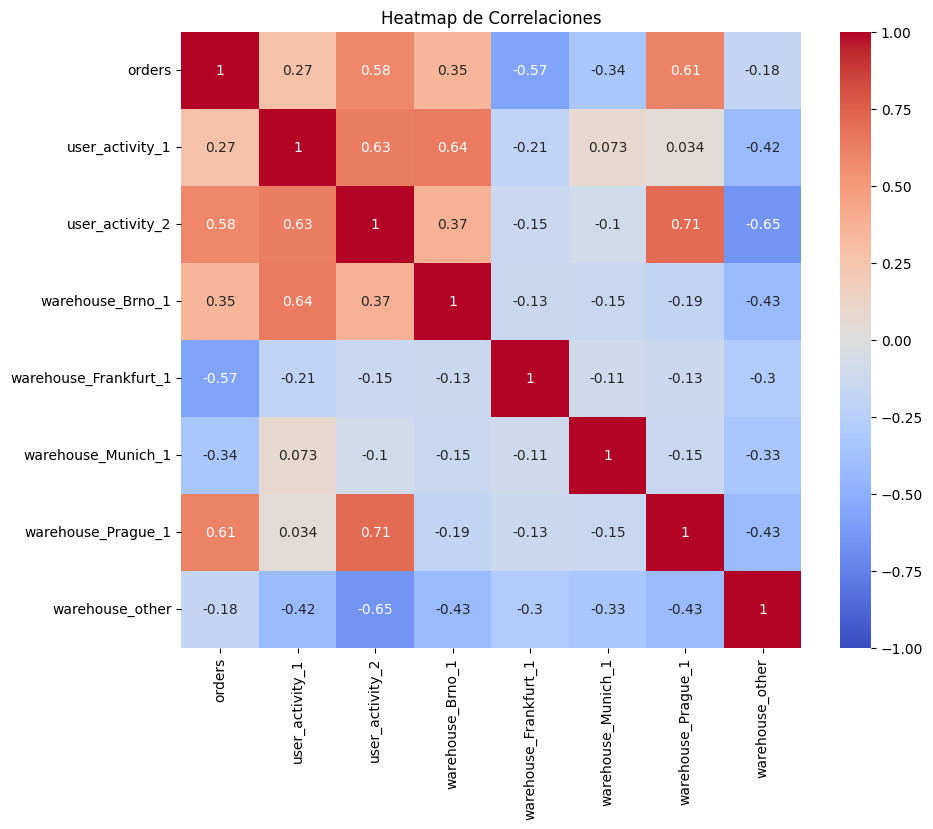

In [446]:
df_warehouse = df_clean.drop(columns=["holiday", "holiday_name", 'date', 'id', "shops_closed", "school_holidays", "winter_school_holidays"])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouse.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en dos (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [450]:
df_clean[["mes"]] = pd.to_datetime(df_clean[["date"]])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing